checking for rough consistency with fig.11 of 2103.01964

In [1]:
from LIMxCMBL.init import *


In [2]:
kmin, kmax, nk = 1e-4, 1e1, 128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk)
pk_lin = ccl.linear_matter_power(cosmo, k, 1)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from LIMxCMBL.kernels import *
from LIMxCMBL.experiments import *

# CCAT Prime

In [5]:
zmin = 3.5
zmax = 8.1
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [6]:
##ccat prime
theta = 30*u.arcsec #theta fwhm
Omegapix = theta**2 / (8  * np.log(2))

In [7]:
Omegapix

<Quantity 162.3031921 arcsec2>

In [8]:
_a, _b = CCAT_prime_Pei()

In [9]:
for idx in idxs[::300]:
    z = zs[idx]
    Vvox = voxelComovingVolume(z, Omegapix, R=100)
    Vvox = Vvox.to(u.Mpc**3)

    Pn_ccat = (5.7e4 *u.Jy / u.sr )**2 * Vvox
    Pn_ccat = Pn_ccat.to((u.kJy / u.sr)**2 * u.Mpc**3)
    print(Pn_ccat, z)

22235.952800146893 kJy2 Mpc3 / sr2 3.5011874288481026
23367.327818812937 kJy2 Mpc3 / sr2 3.9294627894877356
24392.20458607693 kJy2 Mpc3 / sr2 4.420615271169518
25297.42783926739 kJy2 Mpc3 / sr2 4.987839988491326
26069.868595582328 kJy2 Mpc3 / sr2 5.647948972125678
26696.599776754225 kJy2 Mpc3 / sr2 6.422634395181787
27164.69617823313 kJy2 Mpc3 / sr2 7.340278424214837


In [10]:
print(_a, _b)

27394.544314887356 kJy2 Mpc3 / sr2 22232.45245498838 kJy2 Mpc3 / sr2


Text(0.5, 1.0, 'CII')

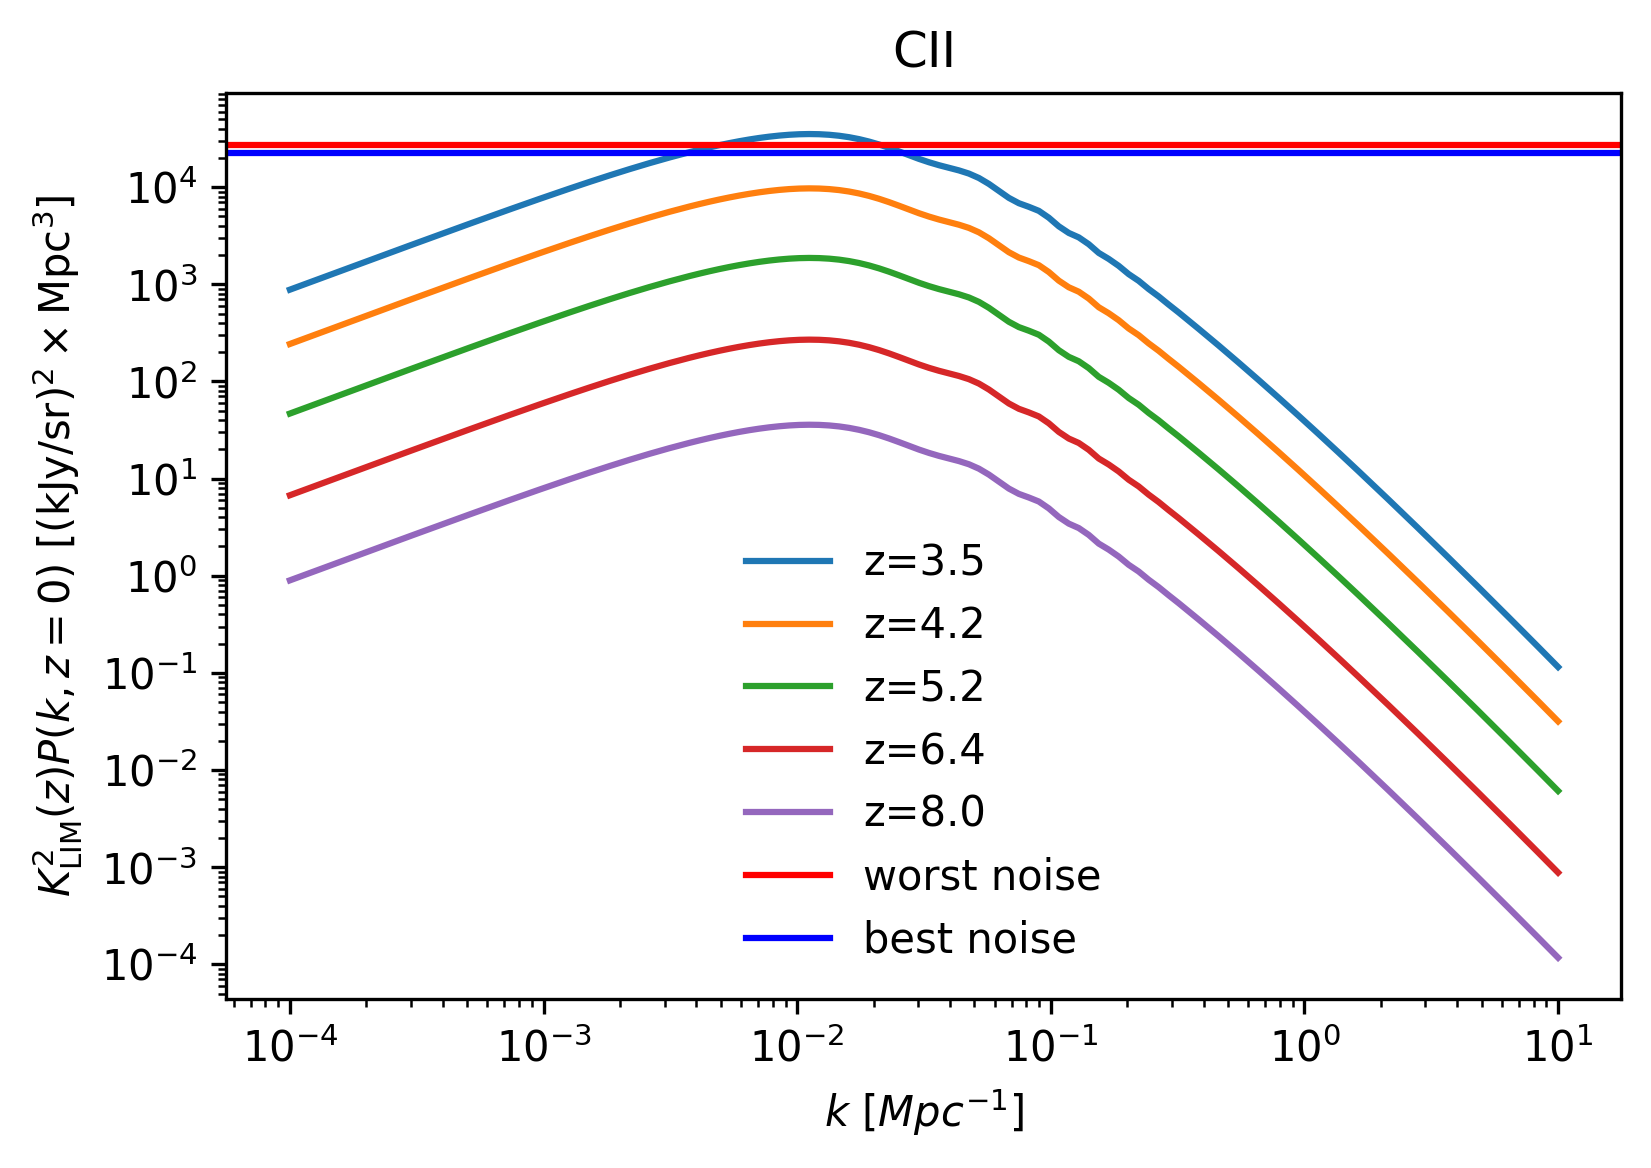

In [11]:
plt.figure(dpi = 300)

for idx in idxs[::500]:
    z = zs[idx]
    
    plt.plot(k, KI[idx]**2 * pk_lin, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(_a), c='r', label='worst noise')
plt.axhline(np.array(_b), c='b', label='best noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [Mpc^{-1}]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )
plt.legend(frameon=False)
plt.title('CII')

# COMAP

adapted from https://github.com/EmmanuelSchaan/HaloGen/blob/LIM/lim_specs.py

In [12]:
#Li Wechsler+ 16 1503.08833 Table 1
R = 800
theta = 6*u.arcmin #theta fwhm
Omegapix = theta**2 / (8  * np.log(2))
Omegasurv = 2.5 * u.deg**2
tObs = 1500 * u.hr

In [13]:
# observing time per pixel [s]
tPixel = tObs * Omegapix / Omegasurv
Tsys = 40 * u.K # system temperature [K]

nFeed = 19.  # number of feeds
dnu = 40 * u.MHz # spectral element width [Hz]
nuCenter = 32 * u.GHz  # 30-34GHz is the COMAP band [Hz]

# radiometer equation (App C1 in Li Wechsler+16)
# giving the pixel noise standard deviation [K]
# and convert with Rayleigh Jeans
sigmaIPixel = (2. * nuCenter**2 * cu.k_B
               * Tsys / np.sqrt(nFeed * dnu * tPixel) # [K]
               / cu.c**2) / u.sr
sigmaIPixel = (sigmaIPixel).to(u.kJy/u.sr)

In [14]:
sigmaIPixel

<Quantity 0.73140154 kJy / sr>

In [15]:
zmin = 2.4
zmax = 3.4
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [16]:
_a, _b = COMAP_Pei()

52.85375219423225 kJy2 Mpc3 / sr2
56.96813521964076 kJy2 Mpc3 / sr2
60.90576624997836 kJy2 Mpc3 / sr2
64.62397220098872 kJy2 Mpc3 / sr2


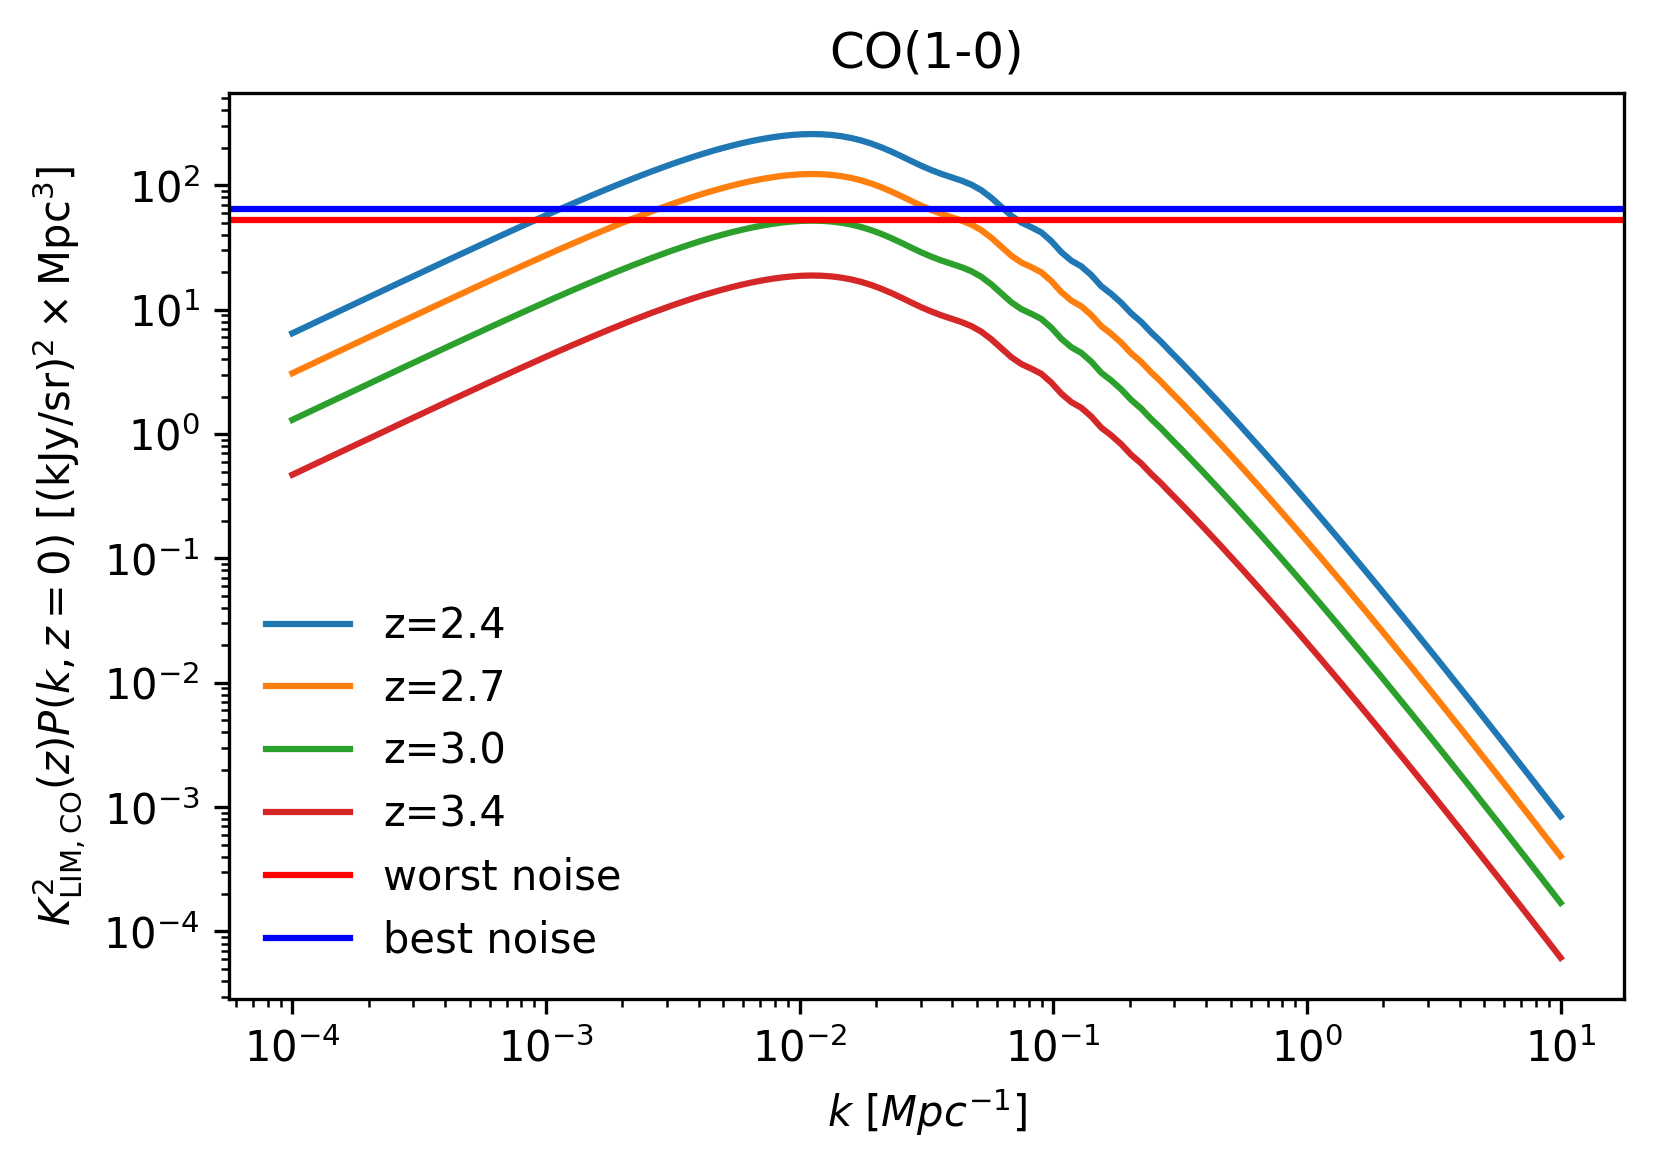

In [17]:
plt.figure(dpi = 300)
for idx in idxs[::300]:
    z = zs[idx]    
    plt.plot(k, KI_CO[idx]**2 * pk_lin, label='z=%.1f'%(z))
    
    Pei = sigmaIPixel**2 * voxelComovingVolume(z, Omegapix, R=R)
    Pei = Pei.to(u.kJy**2 / u.sr**2 * u.Mpc**3)
    print(Pei)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [Mpc^{-1}]$', )
plt.ylabel(r'$K_{\rm LIM,CO}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )

plt.axhline(np.array(_a), c='r', label='worst noise')
plt.axhline(np.array(_b), c='b', label='best noise')
plt.title('CO(1-0)')
plt.legend(frameon=False)

# SPHEREx

In [28]:
zmin = 5
zmax = 8
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [29]:
#1412.4872
#2103.01971

In [30]:
R = 150
Omegapix = (6*u.arcsec)**2
Omegasurv = 2 * 100 * u.deg**2

In [31]:
#also taken from Manu's code
# Inferred from SPHEREx science book
mAB5Sigma = 22 # 5sigma lim mag for point source (Cheng+18)

f5Sigma = 10.**((8.9-mAB5Sigma)/2.5) * u.Jy   # 5sigma lim point source flux [Jy]
sigmaFSource = f5Sigma / 5. # 1sigma lim point source flux [Jy]

# This point source flux is the output of a spatial matched filter
# for one frequency element.
# It needs to be converted to pixel flux.
# The SPHEREx doc, fig 9, gives the conversion using 
# the effective number of pixels covered by the PSF
nPixEff = 3.   # 2-5 in fig 9 of SPHEREx doc

sigmaFPixel = sigmaFSource / np.sqrt(nPixEff)
sigmaIPixel = sigmaFPixel / Omegapix  

# convert from pixel variance
# to white noise power spectrum
result = sigmaIPixel**2 * voxelComovingVolume(9, Omegapix, R=R)
result = result.to((u.kJy/u.sr)**2 * u.Mpc**3)

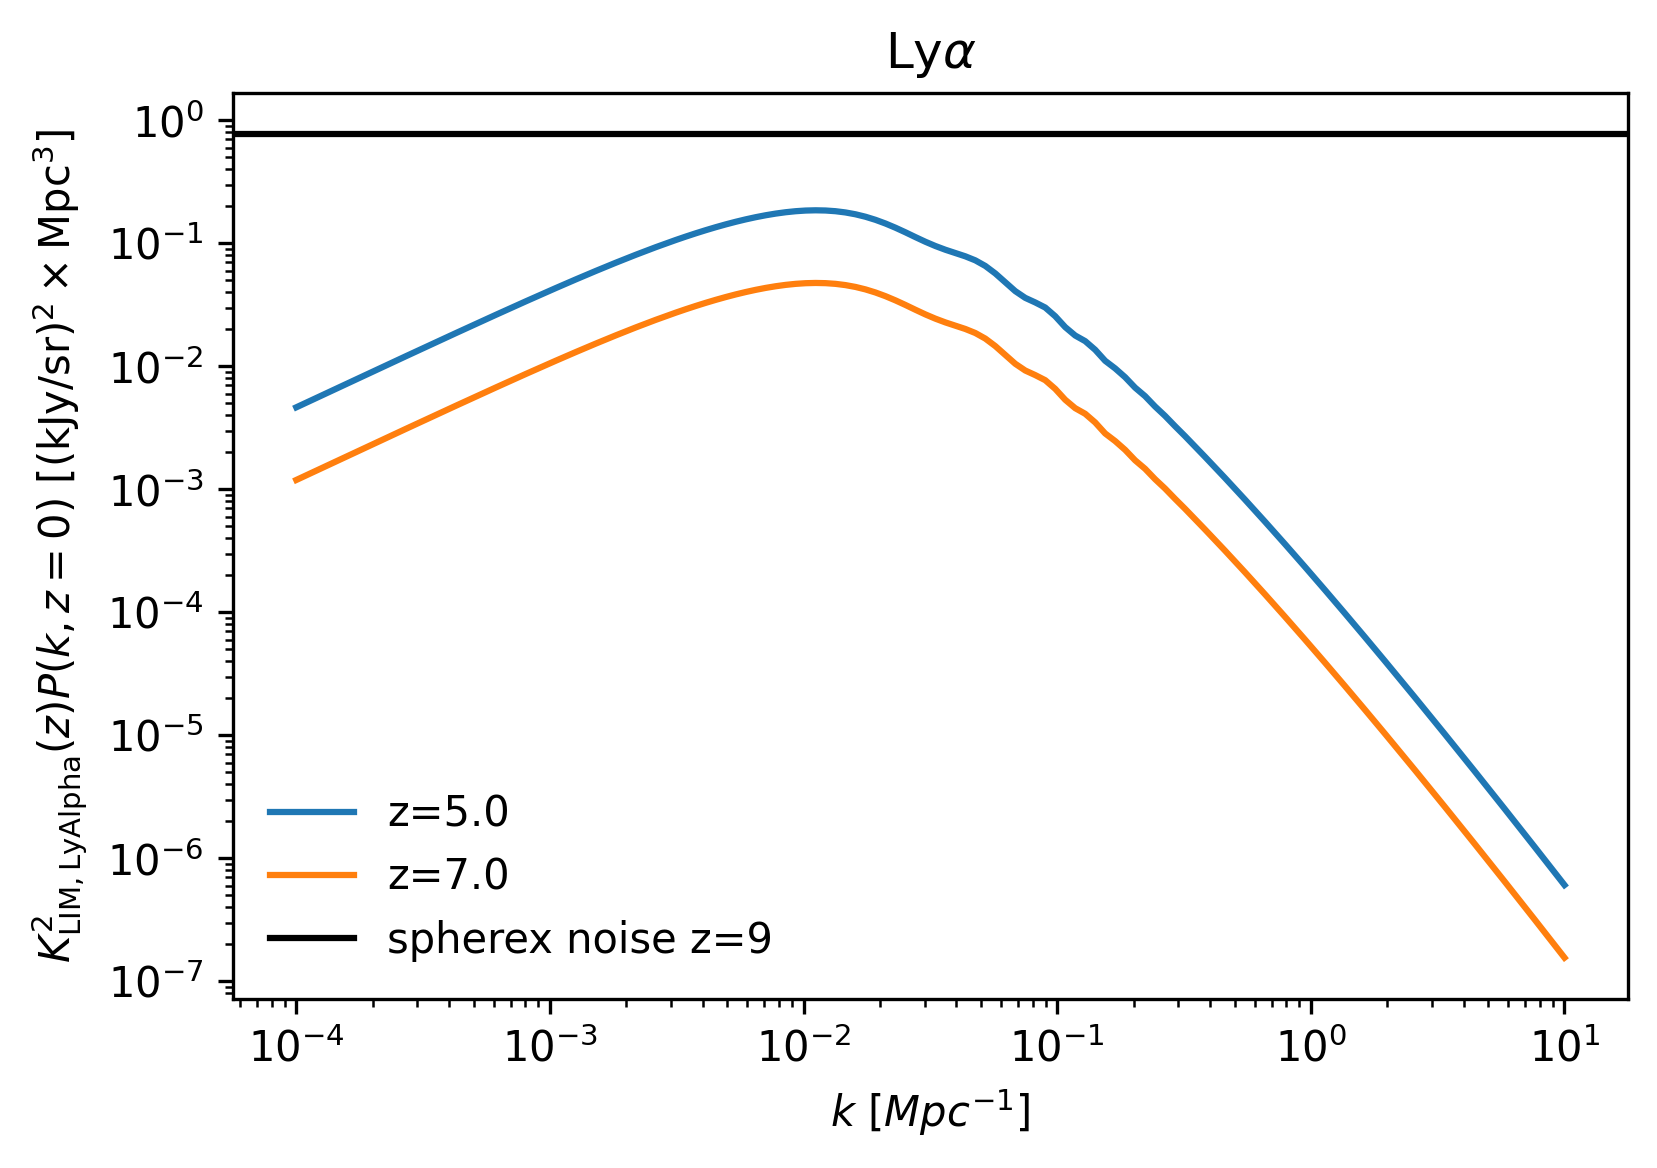

In [32]:
plt.figure(dpi = 300)
for idx in idxs[::800]:
    z = zs[idx]    
    plt.plot(k, KI_Lya[idx]**2 * pk_lin, label='z=%.1f'%(z))
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [Mpc^{-1}]$', )
plt.ylabel(r'$K_{\rm LIM,LyAlpha}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )

plt.axhline(np.array(result), c='k', label='spherex noise z=9')


# plt.axhline(np.array(_a), c='r', label='worst noise')
# plt.axhline(np.array(_b), c='b', label='best noise')
plt.title(r'Ly$\alpha$')
plt.legend(frameon=False)

# HETDEX

In [33]:
zmin = 1.9
zmax = 3.5
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [34]:
R = 800
Omegapix = (3*u.arcsec)**2
Omegasurv = 300 * u.deg**2

In [43]:
print(nu_Lya.to(u.Hz))

2465398503289473.5 Hz


In [61]:
z=zmax

In [62]:
# focus on Lyman-alpha
nuHz = nu_Lya / (1.+z) # convert from rest to observed freq
# flux noise from Hill+08, Cheng+18 (similar to Hill+16)
# they quote the 5-sigma uncertainty --> divide by 5
sigmaFPixel = 5.5e-17 / 5.  * u.erg / u.s / u.cm**2
# convert from flux to intensity
sigmaIPixel = sigmaFPixel / Omegapix * R/nuHz   # [erg/s/cm^2/sr/Hz]
print(sigmaIPixel.to(u.Jy/u.sr))
# convert to noise power spectrum
result = sigmaIPixel**2 * voxelComovingVolume(z, Omegapix, R=R)

4893.293876602423 Jy / sr


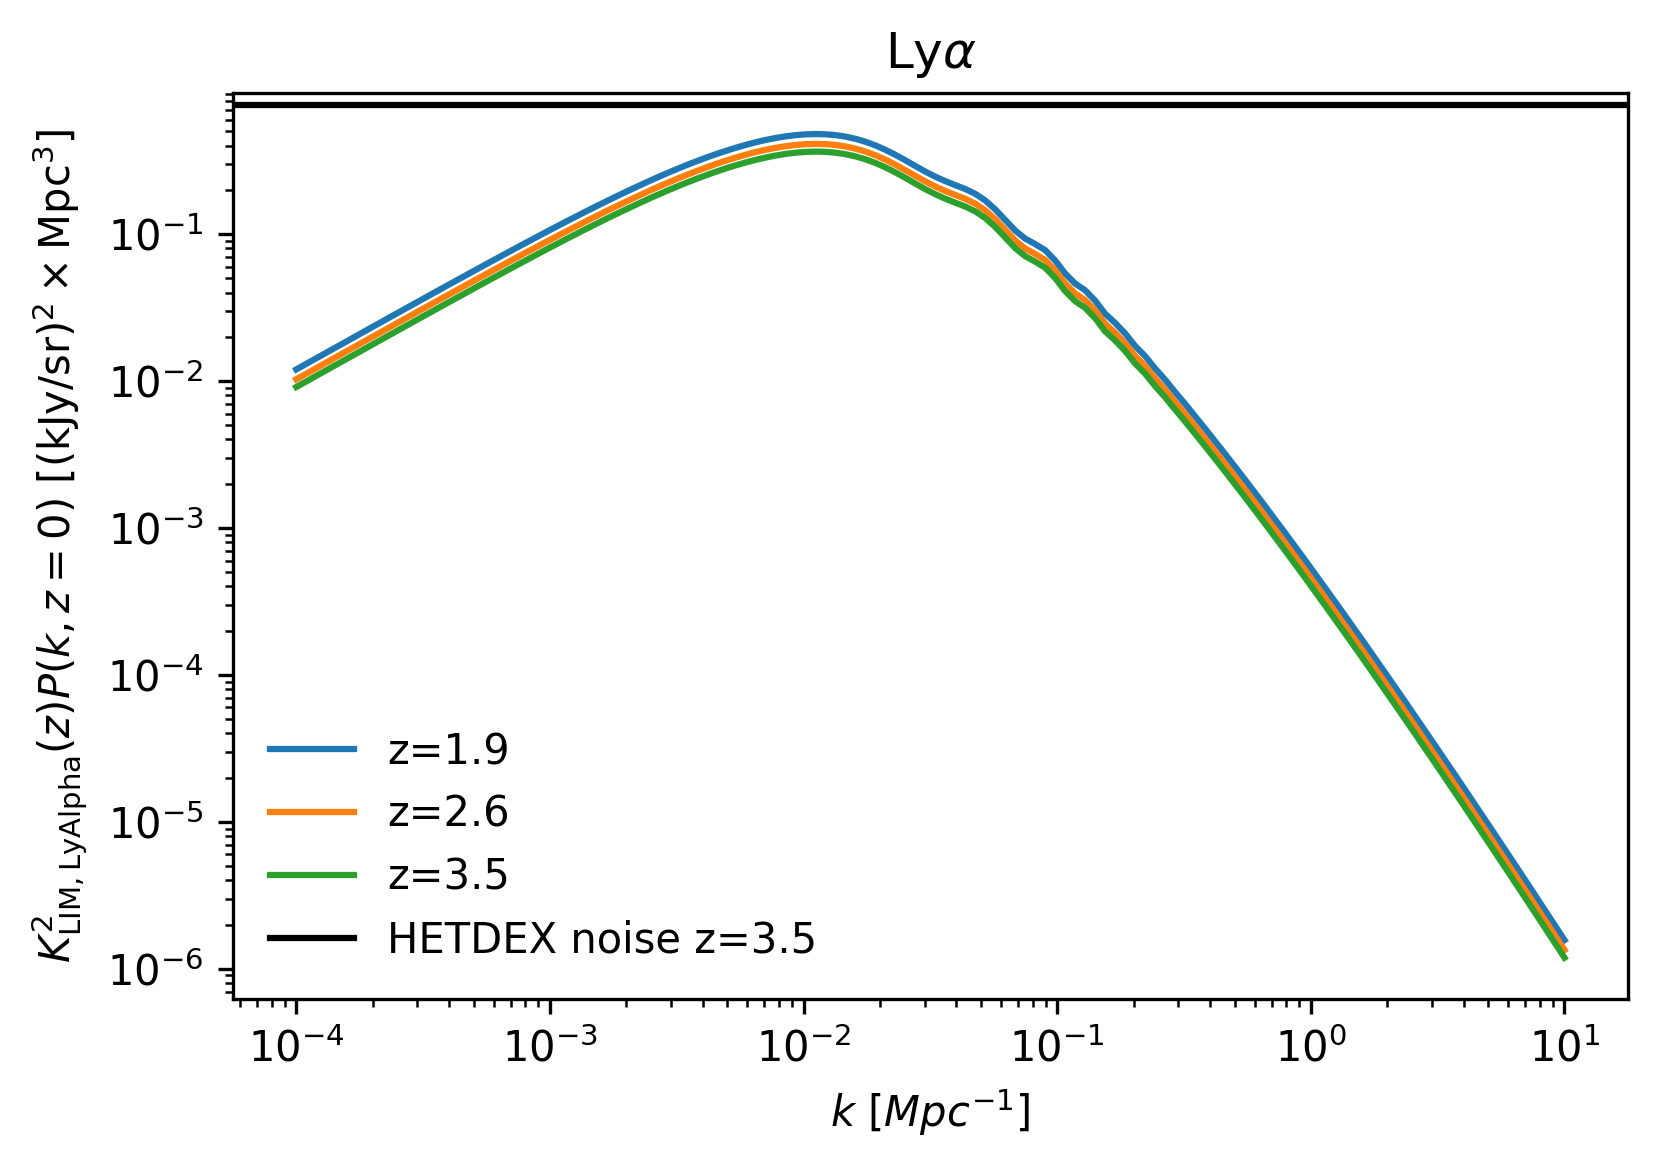

In [63]:
plt.figure(dpi = 300)
for idx in idxs[::800]:
    z = zs[idx]    
    plt.plot(k, KI_Lya[idx]**2 * pk_lin, label='z=%.1f'%(z))
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [Mpc^{-1}]$', )
plt.ylabel(r'$K_{\rm LIM,LyAlpha}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )

plt.axhline(np.array(result.to(u.Mpc**3 * (u.kJy/u.sr)**2)), c='k', label='HETDEX noise z=3.5')


# plt.axhline(np.array(_a), c='r', label='worst noise')
# plt.axhline(np.array(_b), c='b', label='best noise')
plt.title(r'Ly$\alpha$')
plt.legend(frameon=False)

# CHIME

In [91]:
zmin = 1.
zmax = 1.3
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [126]:
#from 2201.07869 App. A.3
R = ((nu_HI/(1+zmax))/(390 * u.kHz)).to(u.dimensionless_unscaled)
Omegapix = (40*u.arcmin)**2
Omegasurv = 31000 * u.deg**2

In [127]:
R

<Quantity 1591.50850985>

In [130]:
#1809.06384
#0910.5007
#2201.07869 App. A.3
sigmaT = 2.9e-4 * u.K
sigmaIPixel = (2. * (nu_HI/(1+zmin))**2 * cu.k_B
               * sigmaT # [K]
               / cu.c**2) / u.sr
sigmaIPixel = (sigmaIPixel).to(u.kJy/u.sr)
result = sigmaIPixel**2 * voxelComovingVolume(zmax, Omegapix, R=R)

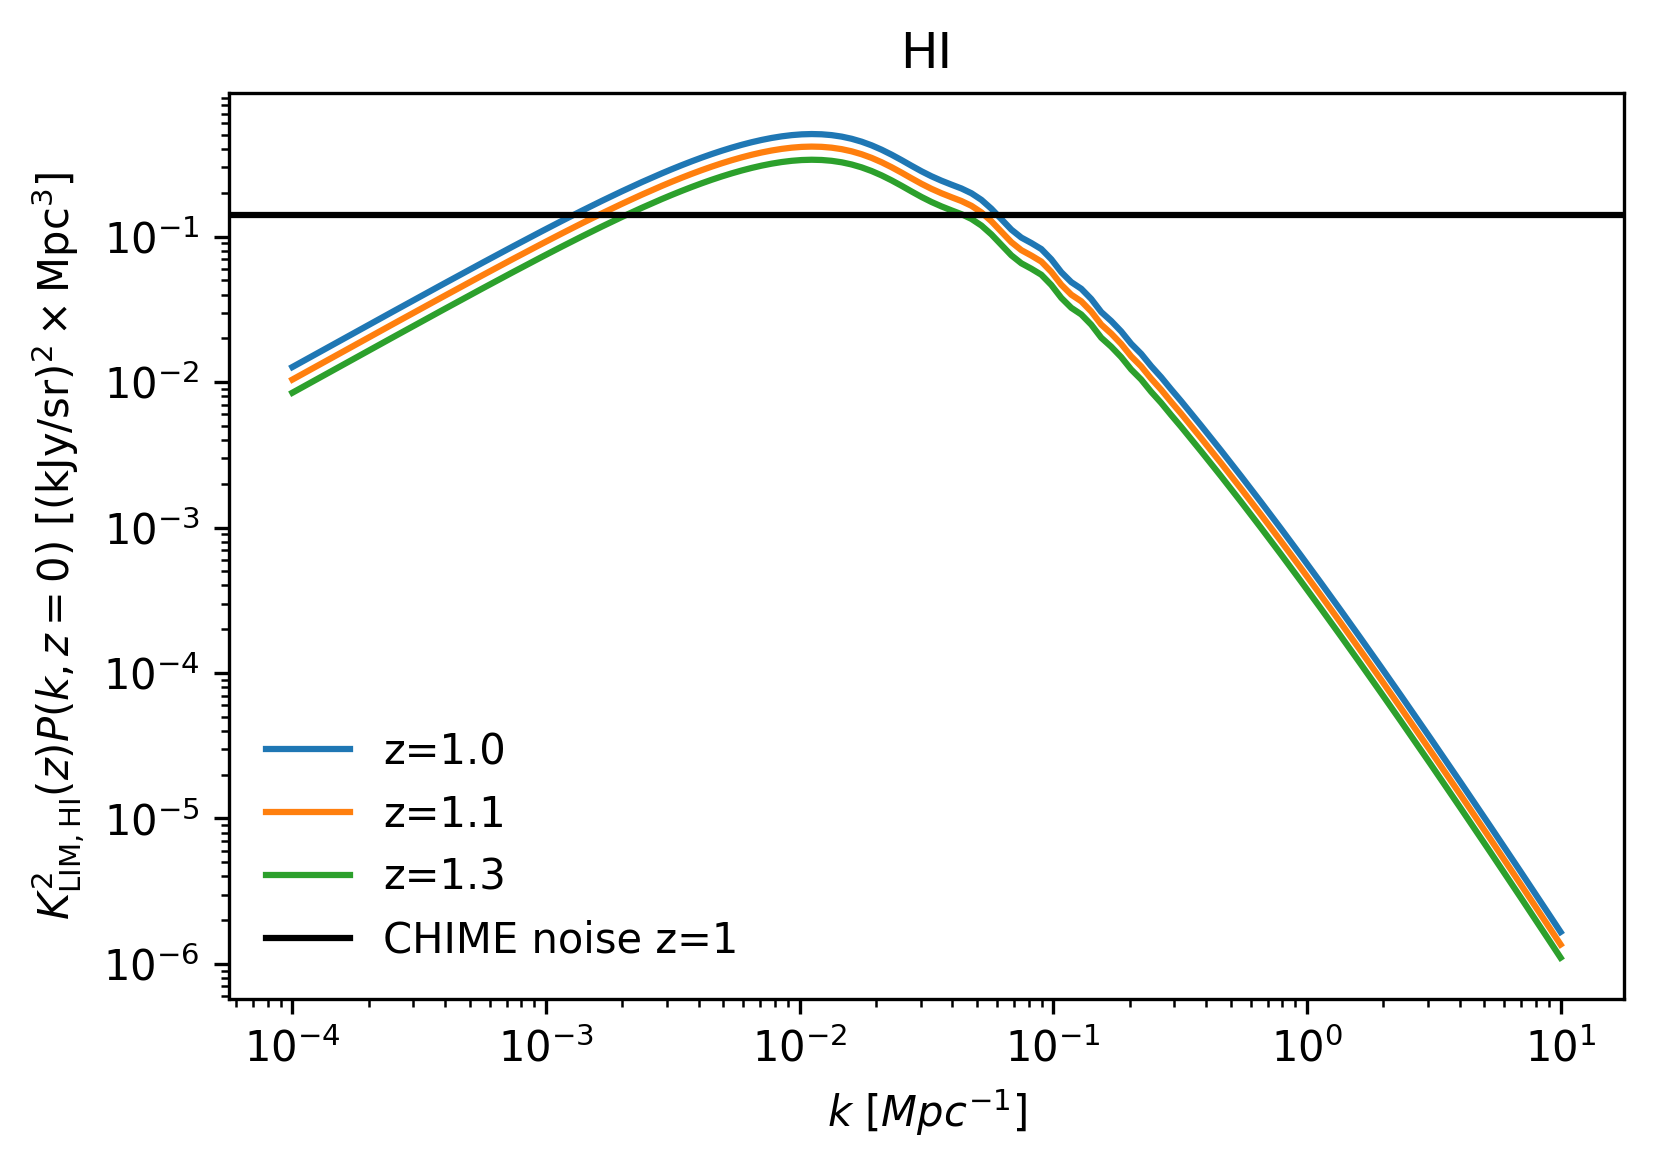

In [131]:
plt.figure(dpi = 300, facecolor='w')
for idx in idxs[::300]:
    z = zs[idx]    
    plt.plot(k, KI_HI[idx]**2 * pk_lin, label='z=%.1f'%(z))
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [Mpc^{-1}]$', )
plt.ylabel(r'$K_{\rm LIM,HI}^2(z)P(k, z=0)\ [{\rm (kJy/sr)^2\times Mpc}^3]$', )

plt.axhline(np.array(result.to(u.Mpc**3 * (u.kJy/u.sr)**2)), c='k', label='CHIME noise z=1')


# plt.axhline(np.array(_a), c='r', label='worst noise')
# plt.axhline(np.array(_b), c='b', label='best noise')
plt.title(r'HI')
plt.legend(frameon=False)